# Decreasing Traffic Fatality in the U.S

### Abstract
This code provides an analysis of a dataset that shows the distribution of fatal car accidents by incident type throughout the U.S. The purpose is to profile U.S States based on their similarity using Principal Components Analysis(PCA) and K-means Clustering. The analysis provides an answer to how can we build good policy actions plans for reducing traffic-related deaths that focus on State-specific needs rather than a one-size-fits-all approach for the Country. Further, it provides a recommendation on which clusters to focus on in terms of number of accidents/miles per cluster. 

To accomplish this, I make use of data wrangling, plotting, dimensionality reduction, and unsupervised clustering.

## 1. Loading the Dataset

In [280]:
#Check the directory of the datasets
import os
os.getcwd()

'C:\\Users\\Misha\\Documents\\DATA_601'

In [281]:
#Import the pandas module as pd
import pandas as pd

# Load dataset into a pandas dataframe called accidents_head
car_acc = pd.read_csv("bad-drivers.csv")

In [282]:
# Inspect data by printing the first 5 rows using head()
car_acc.head(5)

,state,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [283]:
car_acc.drop(['Car Insurance Premiums ($)', 'Losses incurred by insurance companies for collisions per insured driver ($)'], axis='columns', inplace=True)

car_acc = car_acc.rename(columns={'Number of drivers involved in fatal collisions per billion miles': 'drvr_fatl_col_bmiles', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding': 'perc_fatl_speed', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired': 'perc_fatl_alcohol', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted': 'drvr_fatl_distracted', 'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents': 'perc_fatl_1st_time'}, inplace = False)

car_acc.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,drvr_fatl_distracted,perc_fatl_1st_time
0,Alabama,18.8,39,30,96,80
1,Alaska,18.1,41,25,90,94
2,Arizona,18.6,35,28,84,96
3,Arkansas,22.4,18,26,94,95
4,California,12.0,35,28,91,89


The last two columns (car insurance premiums and losses incurred by insurance companies for collisions per insured driver) have been dropped as they are not relevant to the cause of of fatal car accidents.

## 2. Reading in and getting a summary of the data

In [284]:
# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail(5)

There are 51 rows and 6 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   drvr_fatl_distracted  51 non-null     int64  
 5   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,drvr_fatl_distracted,perc_fatl_1st_time
46,Virginia,12.7,19,27,87,88
47,Washington,10.6,42,33,82,86
48,West Virginia,23.8,34,28,97,87
49,Wisconsin,13.8,36,33,39,84
50,Wyoming,17.4,42,32,81,90


In [285]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       drvr_fatl_distracted  perc_fatl_1st_time  
count             51.000000            51.00000  
mean              85.921569            88.72549  
std               15.158949             6.96011  
min               10.000000            76.00000  
25%               83.000000            83.50000  
50%               88.000000            88.00000  
75%               95.000000            95.0000

<Figure size 800x640 with 0 Axes>

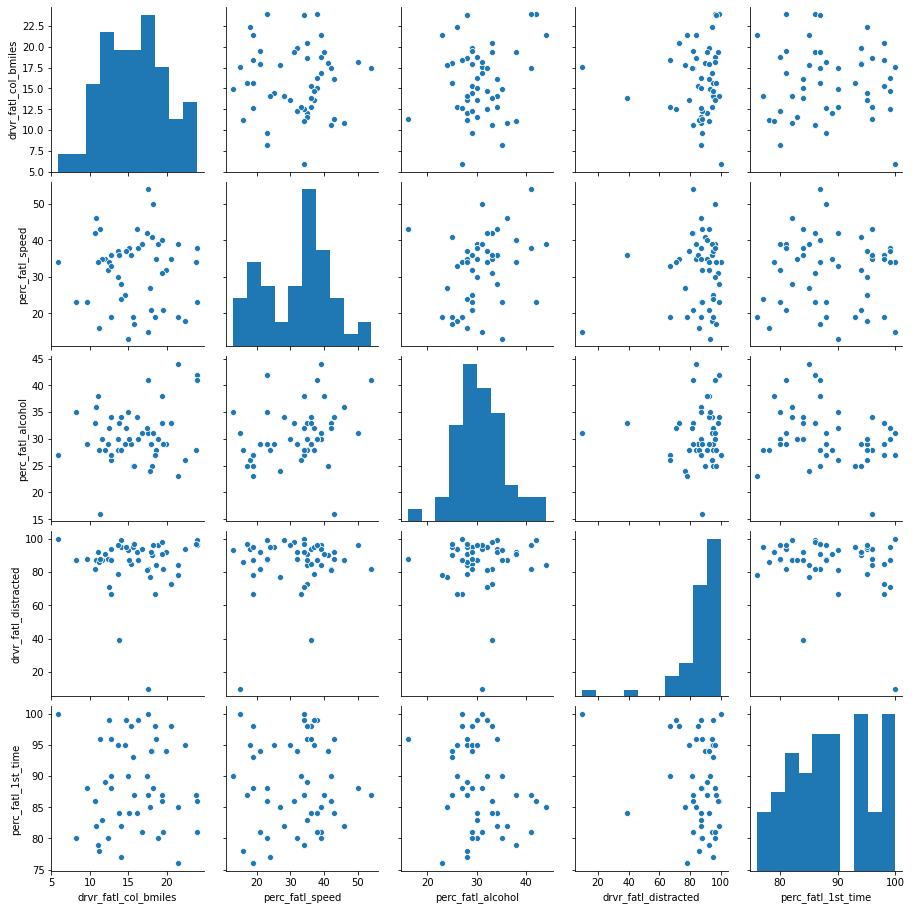

In [286]:
# Create a pairwise scatter plot to explore the data
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(car_acc)

## 3. Quantifying the relationship of features and accidents
The scatterplots reflect an interesting relationship between the target variable (the number of fatal accidents) and the feature variables the other four columns. To quantify the pairwise relationships, the Pearson correlation coefficient matrix can be used. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention. The threshholds below are commonly used:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

In [287]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,drvr_fatl_distracted,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,0.009782,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.131738,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,0.043380,-0.245455
drvr_fatl_distracted,0.009782,0.131738,0.043380,1.000000,-0.195265
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,-0.195265,1.000000


## 3. Fit a multivariate linear regression
As shown in the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). We further can observe that some of the features are correlated with each other, for example, where speeding and alcohol consumption are positively correlated. Therefore, we will need to calculate the relationship of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.

Both the multivariate regression and the correlation measure how strongly the features are associated with the outcome (fatal accidents). When comparing the regression coefficients with the correlation coefficients, we will see that they vary. This is because multiple regression calculates the relationship of a feature with an outcome, given the association with all other features, which is not taken into account when computing the correlation coefficients.

In [288]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc[['perc_fatl_speed', 'perc_fatl_alcohol', 'drvr_fatl_distracted','perc_fatl_1st_time']]
target = car_acc['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04319058,  0.19175307,  0.00591946,  0.02743842])

This method scales the variables. Each coefficient represents the expected change in the response given a change of one standard deviation in the variable.

## 4. Fit our standardized data using PCA

In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. 

The individual variance of the principal componenets are [0.36372658 0.26179706 0.23205634 0.14242002]
The cumulative variance of the first two principal componenets is 0.62552


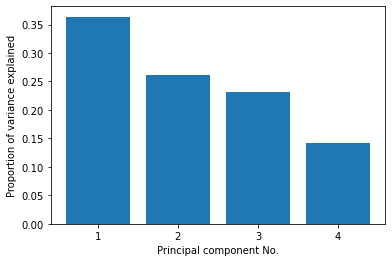

In [291]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component No.')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3, 4])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
explained_pca_var_ratio = pca.explained_variance_ratio_
print("The individual variance of the principal componenets are" , explained_pca_var_ratio)
print("The cumulative variance of the first two principal componenets is {}".format(
    round(two_first_comp_var_exp, 5)))

The Figure above shows that the first three components explain the a

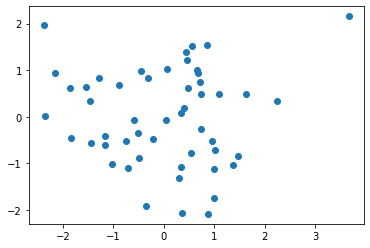

In [290]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

## 5. Using K-means to find clusters of similar States

In this step, we will use k-means clustering to view the top three PCA components. We will first fit these principal components to the k-means algorithm and determine the best number of clusters.

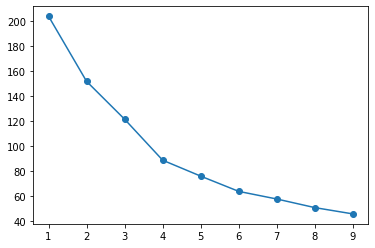

In [269]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explantory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusers (k)
    km = KMeans(n_clusters=k, random_state=10)
    # Fit the scaled scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

The graph shows that after 4 clusters at (the elbow) the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=4 and proceed to the last step in the process.

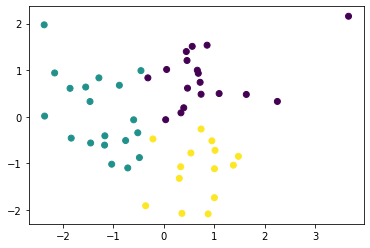

In [294]:
# Create a KMeans object with 4 clusters 
km = KMeans(n_clusters= 3, random_state=10)
# Fit the data to the `km` object
km.fit(features_scaled)
# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

The four groups are clusters of states in three distinct groups that show the percentage of drivers speeding, under alcohol influence, been distracted and that has not previously been involved in an accident. I chose to cluster in three groups instead of four as there was not an adequate number in the fourth cluster to justify a new group. 

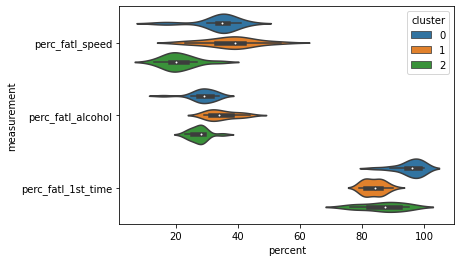

In [295]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster')

## 6. Calculating the total number of accidents within each cluster

It is clear that different groups of states may require different policy interventions to reduce fatal car accidents. Next we will include data on how many miles are driven in each state, because this will help us to compute the total number of fatal accidents in each state. Data on miles driven is uploaded in another tab-delimited text file. We will assign this new information to a column in the DataFrame and create a violin plot for how many total fatal traffic accidents there are within each state cluster.

In [296]:
# Read in the `miles-drives.csv`
miles_driven = pd.read_csv("miles-driven.csv", sep='|')

In [297]:
miles_driven.head(5)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [298]:
car_acc = car_acc.rename(columns={'State': 'state'})
car_acc.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,drvr_fatl_distracted,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,96,80,1
1,Alaska,18.1,41,25,90,94,0
2,Arizona,18.6,35,28,84,96,0
3,Arkansas,22.4,18,26,94,95,2
4,California,12.0,35,28,91,89,0


In [328]:
# Read in the `miles-drives.csv`
miles_driven = pd.read_csv("miles-driven.csv", sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = car_acc.merge(miles_driven, on='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually'] / 1000

car_acc_miles.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,drvr_fatl_distracted,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,96,80,1,64914,1220.3832
1,Alaska,18.1,41,25,90,94,0,4593,83.1333
2,Arizona,18.6,35,28,84,96,0,59575,1108.0950
3,Arkansas,22.4,18,26,94,95,2,32953,738.1472
4,California,12.0,35,28,91,89,0,320784,3849.4080


,count,mean,sum
cluster,,,
0,18,730.432683,13147.7883
1,19,927.241837,17617.5949
2,14,1062.130514,14869.8272


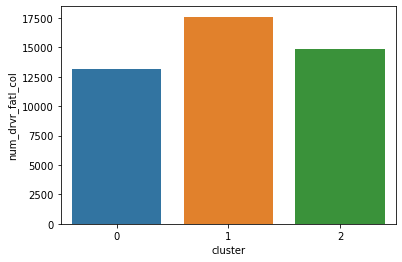

In [329]:
# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

In [330]:
groupby_clusters = car_acc['state'].groupby(car_acc['cluster']) 
print(groupby_clusters.count())

cluster
0    18
1    19
2    14
Name: state, dtype: int64


## Conclusion

As shown in the bar chart above, we see that States in cluster 1 that consists of 19 states (17,617 deaths, 38.6%) have the greatest number of drivers involved in fatal collisions followed closely by States in cluster 2 consisting of 18 states (14,869 deaths, 32.5%) and then States in cluster 0 consisting of 14 states (13,147 deaths, 28.8%). If resources are tied, policy-makers should focus on reducing incidents based on this flow of priority. 

###### *Note: Coding has been worked off the guided DataCamp project*